# Chapter 2: Drawing with 2D Vectors

## 2.1 Picturing 2D Vectors

In [57]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *

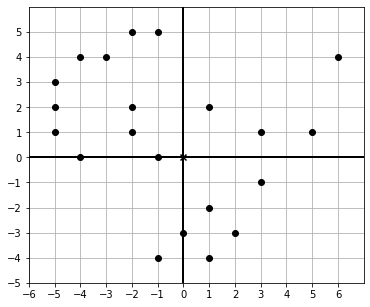

In [177]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors)
)

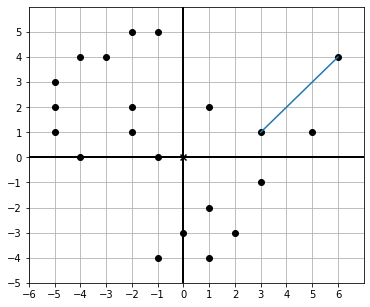

In [3]:
draw(
    Points(*dino_vectors),
    Segment((6,4), (3,1))
)

**EXERCISE:** Draw the dinosaur with the dots connected by constructing a `Polygon` object with the `dino_vectors` as its vertices.

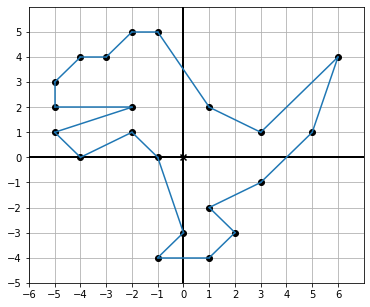

In [10]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

**EXERCISE** Draw the vectors `[(x,x**2) for x in range(-10,11)]` as points (dots) using the draw function.  What is the result?

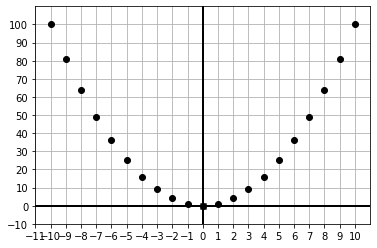

In [13]:
draw(
    Points(*[(x, x**2) for x in range(-10,11)]),
    grid=(1,10),
    nice_aspect_ratio=False
)

# Plane Vector Arithmetic

In [15]:
def add(v1, v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

In [16]:
dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]

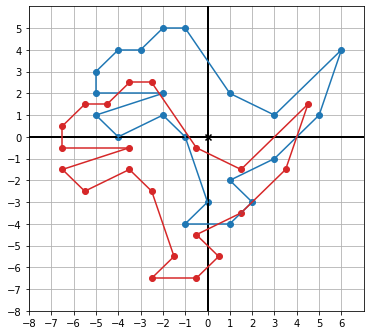

In [17]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
    )

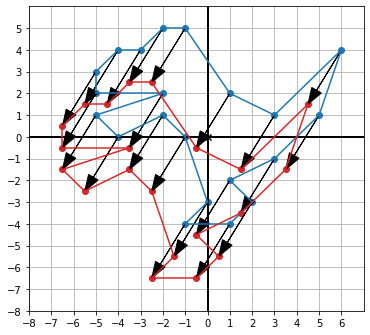

In [46]:
arrows = [Arrow(tip, tail, color=black) for (tip, tail) in zip(dino_vectors2, dino_vectors)]

draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red),
    *arrows,
    )


## Vector components and lengths

In [46]:
from math import sqrt
def length(vector):
    return sqrt(vector[0]**2 + vector[1]**2)

In [262]:
from math import sqrt
def length(vector):
    return sqrt(sum([component**2 for component in vector]))

## Subtraction, displacement, and distance

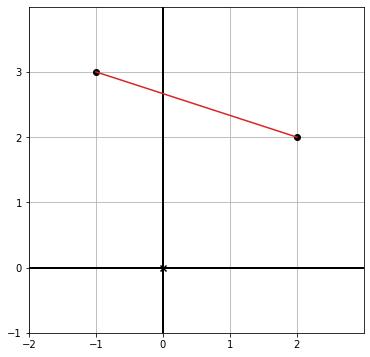

In [57]:
draw(
    Points((2,2), (-1,3)),
    Segment((2,2), (-1,3), color=red)
)

**MINI-PROJECT:** You can add any number of vectors together by summing all of their $x$-coordinates and all of their $y$-coordinates.  For instance the four-fold sum (1,2) + (2,4) + (3,6) + (4,8) has $x$-component 1 + 2 + 3 + 4 = 10 and $y$-component 2 + 4 + 6 + 8 = 20, making the result (10,20).  Implement a revised add function that takes any number of vectors as arguments.

In [291]:
def add(*vectors):
    return [sum(component) for component in zip(*vectors)]

In [70]:
vectors_2d = [(1,2), (2,4), (3,6), (4,8)]
vectors_3d = [(1,2,3), (2,4,5), (3,6,7), (4,8,9)]

add(*vectors_2d), add(*vectors_3d)

([10, 20], [10, 20, 24])

**EXERCISE:** Write a function translate(translation, vectors) that takes in a translation vector and a list of input vectors and returns a list of the input vectors all translated by the translation vector. For instance, `translate((1,1), [(0,0), (0,1,), (-3,-3)])` should return `[(1,1),(1,2),(-2,-2)]`.

In [289]:
def translate(t, vectors):
    return [add(t, vector) for vector in vectors]


In [74]:
translate((1,1), [(0,0), (0,1), (-3,-3)])

[[1, 1], [1, 2], [-2, -2]]

In [106]:
translate((1,1), dino_vectors)

[[7, 5],
 [4, 2],
 [2, 3],
 [0, 6],
 [-1, 6],
 [-2, 5],
 [-3, 5],
 [-4, 4],
 [-4, 3],
 [-1, 3],
 [-4, 2],
 [-3, 1],
 [-1, 2],
 [0, 1],
 [1, -2],
 [0, -3],
 [2, -3],
 [3, -2],
 [2, -1],
 [4, 0],
 [6, 2]]

**MINI-PROJECT:** Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies of the dinosaur.  This shows the power of computer graphics: imagine how tedious it would be to specify all 2,100 coordinate pairs by hand!

In [121]:
def hundred_dinos():
    xform = [Polygon(*translate((x, y), dino_vectors)) 
            for y in range(10, 120, 12) for x in range(10, 120, 12)]
    draw(*xform, grid=None, axes=None, origin=None)

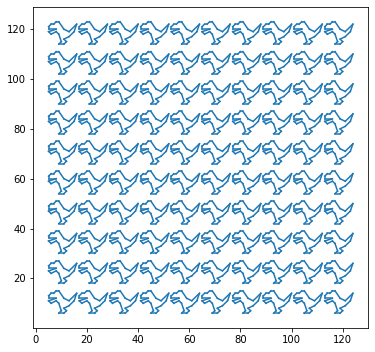

In [122]:
hundred_dinos()

In [15]:
def hundred_dinos():
    translation = [(12*x, 12*y) for x in range(0,9) for y in range(0,9)]
    dinos = [Polygon(*translate(t, dino_vectors)) for t in translation]
    draw(*dinos, grid=None, axes=None, origin=None)

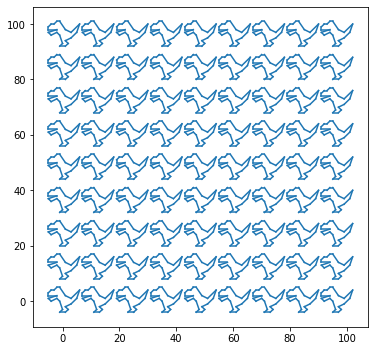

In [16]:
hundred_dinos()

**EXERCISE:** What vector in the dino_vectors list has the longest length?  Use the Python length function to compute the answer quickly.

In [123]:
max(dino_vectors, key=length)

(6, 4)

**EXERCISE:** Suppose a vector $\vec{w}$ has coordinates $(2 ,3)$.  What are the approximate coordinates of the scalar multiple $\pi \cdot \vec{w}$?  Draw an approximation of the original vector and the new vector.

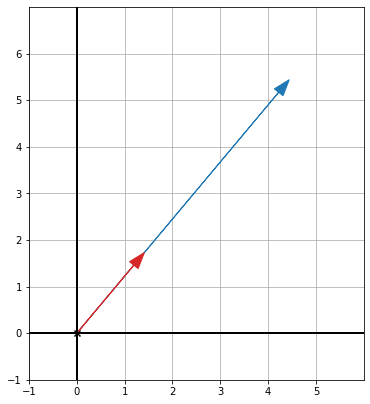

In [132]:
from math import pi, sqrt
u = (sqrt(2), sqrt(3))
v = [pi * component for component in u]

draw(
    Arrow(v, color=blue),
    Arrow(u),
)

**EXERCISE:** Write a python function `scale(s, v)` that multiplies the input vector `v` by the input scalar `s`.

In [138]:
def scale(scalar, vector):
    return [scalar * component for component in vector]

In [139]:
scale(5, (4,5))

[20, 25]

**MINI-PROJECT:** Suppose $\vec{u} = (-1,1)$ and $\vec{v} = (1,1)$ and suppose $r$ and $s$ are real numbers.  Specifically, let’s assume $-1 < r < 1$ and $-3 < s < 3$.  

Where are the possible points on the plane where the vector $r \cdot \vec{u} + s \cdot \vec{v}$ could end up?  

Note: the order of operations is the same for vectors as it is for numbers: we assume scalar multiplication is carried out first, and then vector addition (unless parentheses specify otherwise).

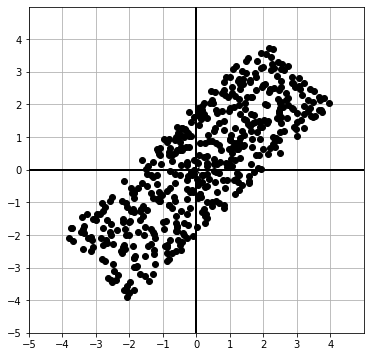

In [178]:
import random

u = (-1,1)
v = (1,1)

vectors = [add(scale(random.uniform(-1,1), u), scale(random.uniform(-3,3), v)) 
for i in range(0,500)]

draw(
    Points(*vectors)
)

**EXERCISE:** Write a Python function `subtract(v1,v2)` that returns the result of `v1` minus `v2`, where the inputs and output are tuples of coordinates as we’ve seen so far.

In [185]:
def subtract(v1,v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

In [186]:
import functools
def subtract(v1,v2):
    return [functools.reduce(lambda x,y: x-y, component) for component in zip(v1,v2)]

In [195]:
u = (2,3,4,4,4)
v = (1,2,3,4,34)

subtract(u,v)

[1, 1, 1, 0, -30]

In [198]:
def distance(v1,v2):
    return length(subtract(v1,v2))

In [200]:
u = (4,5)
v = (1,1)

distance(u,v)

5.0

In [246]:
def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i+1)%len(vectors)])
                    for i in range(0,len(vectors))]
    return sum(distances)

In [247]:
perimeter(dino_vectors)

44.77115093694563

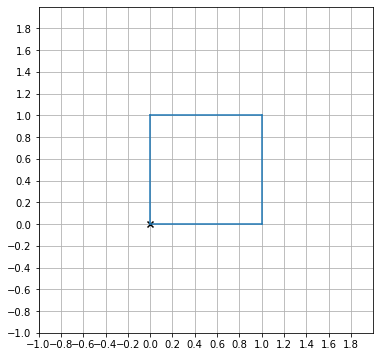

In [248]:
# sanity check with a square
square = [(1,0),(1,1),(0,1),(0,0)]
draw(Polygon(*square), grid=(0.2,0.2), axes=None)

In [249]:
# should be 1+1+1+1=4
perimeter(square)

4.0

In [232]:
positional_vectors = [Arrow(vector, color=blue) for vector in dino_vectors]

def displacement_vectors(vectors):
    disp_vectors = [(vectors[i], vectors[(i+1)%len(vectors)])
                     for i in range(0, len(vectors))]
    return [Arrow(*vector) for vector in disp_vectors]

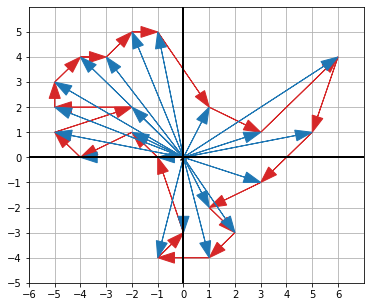

In [234]:
draw(*displacement_vectors(dino_vectors),
    *positional_vectors
    )


**MINI-PROJECT:** Let $\vec{u}$ be the vector $(1,2)$.  Suppose there is another vector, $\vec{v}$, with positive integer coordinates $(n, m)$ such that $n > m$, and having distance $13$ from $\vec{u}$.  What is the displacement from $\vec{u}$ to $\vec{v}$?  Hint: you can use Python to search for the vector $\vec{v}$.

In [317]:
import random

u = (1,2)
# r(n,m) = ?
# n > m > 0 
# distance(u,r) = 13

for n in range(u[0]-13, u[0]+14):
    for m in range(u[1]-13, u[1]+14):
        if (distance(u, (n,m)) == 13) and (n > m > 0):
            print(n,m) 

13 7
14 2


In [319]:
# sanity check
distance(u,(13,7)), distance(u,(14,2)) 

(13.0, 13.0)

In [321]:
import random

u = (1,-1)
# r(n,m) = ?
# n > m > 0 
# distance(u,r) = 13

for n in range(u[0]-13, u[0]+14):
    for m in range(u[1]-13, u[1]+14):
        if (distance(u, (n,m)) == 13) and (n > m > 0):
            print(n,m) 

13 4


In [322]:
# sanity check
distance(u,(13,4))

13.0

# Angles and trigonometry in the plane

## https://www.mathsisfun.com/sine-cosine-tangent.html

## Radians and trigonometry in python

In [1]:
from math import tan
tan(45)

1.6197751905438615

** Think of radians as radius. In half circle we can fit pi * radiuses which is 3.14 radiuses. One radian is equal to one radius lengt of circumference.**

In [2]:
 from math import tan, pi
tan(pi/4) # now this is the tangent of pi/4 radians = 45 degrees 

0.9999999999999999

In [84]:
from math import sin, cos

def to_cartesian(polar_vector):
    radius, angle = polar_vector[0], polar_vector[1]
    return (radius * cos(angle), radius * sin(angle)) 

In [5]:
# Verify that 5 units @ 37 degrees takes us to (4,3)
angle = 37*pi/180
to_cartesian((5,angle))

(3.993177550236464, 3.0090751157602416)

In [230]:
def deg_to_rad(tetha):
    ## deg to rad = tetha / rad
    ## deg to rad = tetha / (180 / pi)
    ## deg to rad = tetha * pi  / 180
    return deg * pi / 180

In [229]:
def rad_to_deg(tetha):
    ## rad to deg = tetha * rad
    ## rad to deg = tetha * (180 / pi)
    ## rad to deg = tetha * pi / 180
    return tetha * 180 / pi

In [11]:
# sanity check
deg_to_rad(45), rad_to_deg(1)

(0.7853981633974483, 57.29577951308232)

## From components back to angles

In [25]:
from math import sin, asin
sin(1)

0.8414709848078965

In [27]:
asin(0.8414709848078965)

1.0

In [29]:
from math import sqrt
asin(3/sqrt(13))

0.9827937232473292

In [31]:
rad_to_deg(0.9827937232473292)

56.30993247402022

In [32]:
from math import acos
acos(-2/sqrt(13))

2.1587989303424644

In [33]:
rad_to_deg(2.1587989303424644)

123.6900675259798

In [34]:
cos(2.1587989303424644)

-0.5547001962252293

In [39]:
-2/sqrt(13)

-0.5547001962252291

In [40]:
sin(2.1587989303424644)

0.8320502943378436

In [41]:
3/sqrt(13)

0.8320502943378437

In [43]:
from math import atan2
atan2(3,-2)

2.158798930342464

In [47]:
def to_polar(vector):
    radius = length(vector)
    angle = atan2(vector[1], vector[0])
    return (radius, angle)

In [48]:
to_polar((1,0))

(1.0, 0.0)

In [49]:
to_polar((-2,3))

(3.605551275463989, 2.158798930342464)

**EXERCISE:** Confirm that the vector given by cartesian coordinates (-1.34,2.68) has length approximately 3, as expected.

In [50]:
length((-1.34, 2.68))

2.9963310898497184

**EXERCISE:** What is $116.57^\circ$ in radians?  Use Python to compute the tangent of this angle, and confirm that it is close to $-2$ as we saw above.

In [51]:
deg_to_rad(116.57)

2.03453030904979

In [52]:
tan(2.0345)

-1.9997197104066462

In [63]:
r = 8.5
tetha = 125

x = r * cos(deg_to_rad(tetha))
y = r * sin(deg_to_rad(tetha))

x,y

(-4.875399708983889, 6.962792376456433)

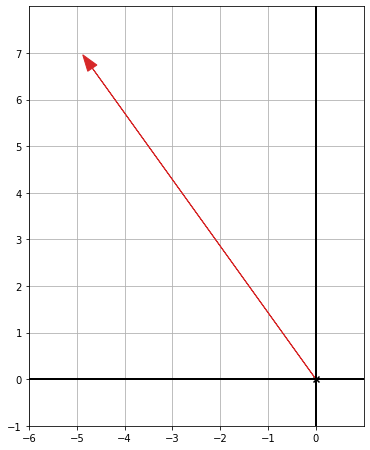

In [64]:
draw(
    Arrow((x,y))
)

**EXERCISE:** Locate the angle $10\pi/6$.  Do you expect the values of $\cos(10\pi/6)$ and $\sin(10\pi/6)$ to be positive or negative?  Use Python to calculate their values and confirm.

In [73]:
rad_to_deg(10*pi/6)

300.00000000000006

In [74]:
cos(10*pi/6), sin(10*pi/6)

(0.5000000000000001, -0.8660254037844386)

**EXERCISE:** The following list comprehension creates 1000 points in polar coordinates.  

In [93]:
polar_coords = [(cos(5*x*pi/500.0), 2*pi*x/1000.0) for x in range(0,1000)]
polar_coords[-1]

(0.9995065603657316, 6.276902121872406)

In Python code, convert them to cartesian coordinates, and connect them in a closed loop with line segments to draw a picture.

In [94]:
cartesian_coords = [to_cartesian(vector) for vector in polar_coords]
cartesian_coords[-1]

(0.9994868309619447, -0.006280043613299272)

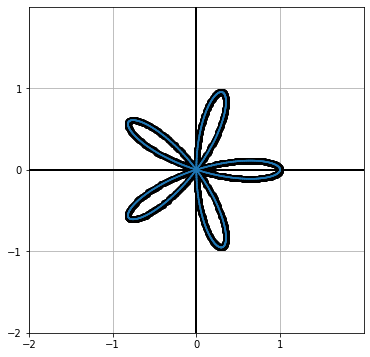

In [108]:
draw(
    Points(*cartesian_coords),
    Polygon(*cartesian_coords)
)

In [100]:
segment_list = [Segment(cartesian_coords[i], cartesian_coords[(i+1)%len(cartesian_coords)]) 
                for i in range(0, len(cartesian_coords))]

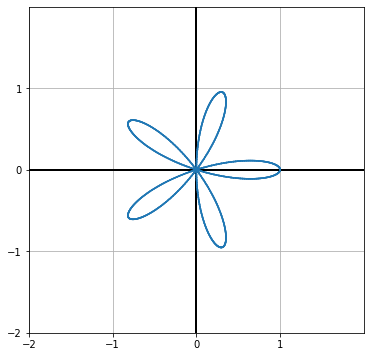

In [102]:
draw(
    *segment_list
)

In [110]:
rad_to_deg(2.159)

123.70158796874472

**EXERCISE:** Find the angle to get to the point (-2,3) by “guess-and-check”.  

In [128]:
3/-2

-1.5

In [133]:
tan(2)

-2.185039863261519

In [136]:
tan(2.5)

-0.7470222972386603

In [137]:
tan(2.25)

-1.2386276162240966

In [139]:
tan(2.125)

-1.61575942397346

In [141]:
tan(2.2)

-1.3738230567687946

In [142]:
tan(2.15)

-1.5289797578045665

In [153]:
tan(2.159)

-1.4993467206361923

**EXERCISE:**  Find another point in the plane with the same tangent as $\theta$, that is $-3/2$.  Use Python’s implementation of the arctangent function, `math.atan`, to find the value of this angle.

In [163]:
from math import atan
atan(3/-2)

-0.982793723247329

**atan(ratio)** -- will return angle for given ratio  
**atan2(x,y)** -- will return angle for given pair of coordinates

**EXERCISE:** Without using Python, what are polar coordinates corresponding to the cartesian coordinates $(1,1)$ and $(1,-1)$?  Once you’ve found the answers, use to_polar to check your work.

**SOLUTION:** The answers should be $(\sqrt{2},\pi/4)$ and $(\sqrt{2},-\pi/4)$.

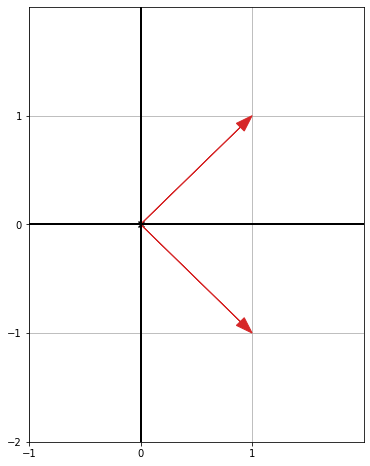

In [165]:
draw(
    Arrow((1,1)),
    Arrow((1,-1))
    )

In [175]:
deg_to_rad(45), deg_to_rad(315)

(0.7853981633974483, 5.497787143782138)

In [170]:
to_polar((1,1)), to_polar((1,-1))

((1.4142135623730951, 0.7853981633974483),
 (1.4142135623730951, -0.7853981633974483))

In [171]:
to_cartesian((1.4142135623730951, 0.7853981633974483))

(1.0000000000000002, 1.0)

In [172]:
to_cartesian((1.4142135623730951, -0.7853981633974483))

(1.0000000000000002, -1.0)

In [176]:
to_cartesian((1.4142135623730951, 5.497787143782138))

(0.9999999999999998, -1.0000000000000002)

**Mini-project 2.40:** What is the angle of the Dinosaur’s mouth? What is the angle of the dinosaur’s toe? Of the point of its tail?

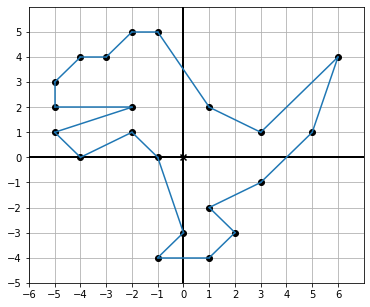

In [181]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

In [189]:
mouth = [(-5,2), (-2,2), (-5,1)]
tail = [(3,1), (6,4), (5,1)]
toe = [(0,-3), (-1,-4), (1,-4)]

In [244]:
mouth_vector_1 = subtract(mouth[0], mouth[1])
mouth_vector_2 = subtract(mouth[2], mouth[1])
mouth_angle_1 = atan2(mouth_vector_1[1], mouth_vector_1[0])
mouth_angle_2 = atan2(mouth_vector_2[1], mouth_vector_2[0])
rad_to_deg(mouth_angle_1 + mouth_angle_2)

18.434948822922006

In [247]:
tail_vector_1 = subtract(tail[0], tail[1])
tail_vector_2 = subtract(tail[2], tail[1])
tail_angle_1 = atan2(tail_vector_1[1], tail_vector_1[0])
tail_angle_2 = atan2(tail_vector_2[1], tail_vector_2[0])
rad_to_deg(tail_angle_2 - tail_angle_1)

26.565051177077976

In [249]:
toe_vector_1 = subtract(toe[0], toe[1])
toe_vector_2 = subtract(toe[2], toe[1])
toe_angle_1 = atan2(toe_vector_1[1], toe_vector_1[0])
toe_angle_2 = atan2(toe_vector_2[1], toe_vector_2[0])
rad_to_deg(toe_angle_1 - toe_angle_2)

45.0

# Transforming collections of vectors

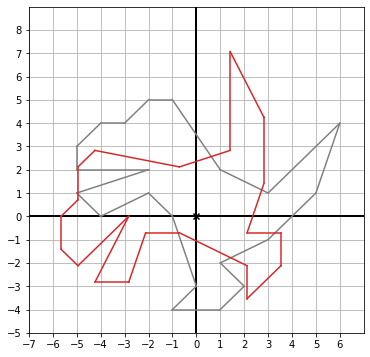

In [250]:
rotation_angle = pi/4

dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l,angle + rotation_angle) for l,angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*dino_rotated, color=red)
)

**EXERCISE:** Create a `rotate(angle, vectors)` function which takes an array of input vectors in cartesian coordinates and returns them by the specified angle (counterclockwise or clockwise according to whether the angle is positive or negative). 

In [272]:
def rotate(rotation_angle, vectors):
    polar_vectors = [to_polar(vector) for vector in vectors]
    rotated_vectors = [(radius, angle + rotation_angle) for radius, angle in polar_vectors]
    cartesian_vectors = [to_cartesian(vector) for vector in rotated_vectors]
    return cartesian_vectors

In [284]:
rotate(pi/4, dino_vectors), len(rotate(pi/4, dino_vectors))

([(1.4142135623730963, 7.071067811865475),
  (1.4142135623730954, 2.8284271247461903),
  (-0.7071067811865474, 2.121320343559643),
  (-4.242640687119285, 2.82842712474619),
  (-4.949747468305833, 2.121320343559643),
  (-4.949747468305833, 0.7071067811865486),
  (-5.656854249492381, 6.927648449883947e-16),
  (-5.656854249492381, -1.4142135623730947),
  (-4.949747468305833, -2.1213203435596415),
  (-2.8284271247461903, 3.4638242249419736e-16),
  (-4.242640687119285, -2.8284271247461907),
  (-2.8284271247461907, -2.82842712474619),
  (-2.121320343559643, -0.7071067811865472),
  (-0.7071067811865477, -0.7071067811865475),
  (2.121320343559643, -2.1213203435596424),
  (2.1213203435596424, -3.5355339059327378),
  (3.5355339059327373, -2.121320343559643),
  (3.5355339059327373, -0.7071067811865476),
  (2.1213203435596424, -0.7071067811865475),
  (2.8284271247461903, 1.4142135623730951),
  (2.82842712474619, 4.242640687119285)],
 21)

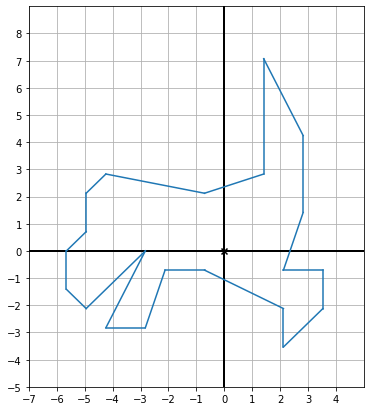

In [287]:
draw(
    Polygon(*rotate(pi/4, dino_vectors))
    )

## Combinin vector transformations

In [301]:
new_dino = translate((8,8), rotate(5 * pi/3, dino_vectors))

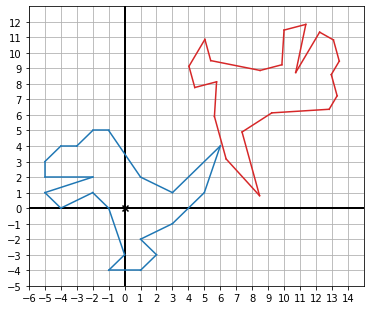

In [300]:
draw(
    Polygon(*dino_vectors),
    Polygon(*new_dino, color=red)
)

**EXERCISE:** Create a function `polygon(n)` which returns cartesian coordinates of a regular $n$-sided polygon (that is, having all angles and side lengths equal).  For instance, `polygon(7)` could produce vectors defining a heptagon.

In [365]:
def polygon(n):
    radius = 1
    angle = 2*pi/n 
    return [to_cartesian((radius, angle*i)) for i in range(0,n)]

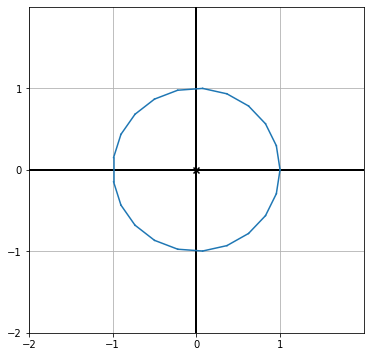

In [369]:
draw(
    Polygon(*polygon(21))
)

In [371]:
r = 5 + 5 + 5
s = 3*5
r, s

(15, 15)

## Drawing with Matplotlib

In [374]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [375]:
class Points():
    def __init__(self, *vectors, color=black):
        self.vectors = list(vectors)
        self.color = color

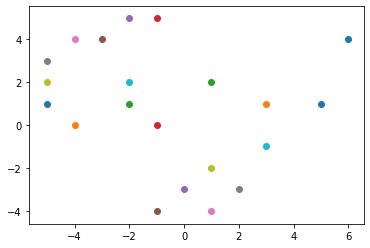

In [391]:
for v in dino_vectors:
    x = v[0]
    y = v[1]
    plt.scatter(x,y)